# Project Statement

# Project Statement

- Create a Jupyter notebook
- Create a data set by simulating a real-world phenomenon of my choosing 
- Model and synthesise such data using Python (suggest to use the numpy.random package for this purpose)
- Choose a real-world phenomenon that can be measured and for which you could collect at least one-hundred data points across at least four different variables.
- Investigate the types of variables involved, their likely distributions, and their relationships with each other.
- Synthesise/simulate a data set as closely matching their properties as possible.
- Detail your research and implement the simulation in a Jupyter notebook – the data set itself can simply be displayed in an output cell within the notebook.

# Introduction

A computer simulation is an application designed to imitate a real-life situation with advanages of 

- It can avoid danger and loss of life.
- Conditions can be varied and outcomes investigated.
- Critical situations can be investigated without risk.
- It is cost effective.
- Simulations can be sped up so behaviour can be studied easily over a long period of time.
- Simulations can be slowed down to study behaviour more closely [1]

The project is to simulate a real-world phenomenon.

# The Framingham Heart Study 

The Framingham Heart Study is now considered one of the longest, most important epidemiological studies in medical history. In the 1960s, the study demonstrated the role cigarette smoking plays in the development of heart disease. Those findings helped to fuel the first anti-smoking campaigns of that era. The study provided researchers with knowledge of how dietary fat can increase the risk of heart disease. It showed a link between cholesterol levels in the blood and an individual's risk for developing heart disease. Later, Framingham data also demonstrated the beneficial role of high-density lipoprotein (HDL) cholesterol and the negative consequences of low-density lipoprotein (LDL) cholesterol. This program has helped to educate physicians, patients, and the public about the dangers of high blood cholesterol and to bring about reductions in Americans' blood cholesterol levels. [2]

## Set up

Import the modules required for project

In [11]:
# Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


warnings.filterwarnings('ignore')
%matplotlib inline

# Investigate the Framingham Heart Data to reporduce real-world dataset
Import the Framingham Heart Data and print out the first 10 rows 

In [12]:
# import data from data folder
# https://github.com/TarekDib03/Analytics/blob/master/Week3%20-%20Logistic%20Regression/Data/framingham.csv
df = pd.read_csv("data/framingham.csv")

# Print first 10 entries
df.head(10)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


## Cleaning up data

To begin the cleanig of data df.describe() will output the count, mean, std, min, max as well as lower, 50 and upper percentiles the lower (25) and upper (75) percentiles. The 50 percentile is the same as the median. [4]

In [13]:
# Print the count, mean, std, min, max as well as lower, 50 and upper percentiles. 
# The lower (25) and upper (75) percentiles. The 50 percentile is the same as the median.
# This is to give an overview of the dataset including missing values
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


The dataframe has 16 rows for the purpose of the project we require a minimum four different variables. To select the variables required for the project a correlation matrix investigates the dependence between multiple variables at the same time. It shows symmetric tabular data where each row and column represent a variable, and the corresponding value is the correlation coefficient denoting the strength of a relationship between these two variables. [5]

Using TenYearCHD (10 year risk of coronary heart disease(CHD)) we are going to identify the variables and the strength of a relationship with the other variables 

In [14]:
# To select the variables required for the project A correlation matrix investigates the dependence 
# between multiple variables at the same time. It shows symmetric tabular data where each row and column 
# represent a variable, and the corresponding value is the correlation coefficient denoting the strength of a 
# relationship between these two variables. 
# https://www.geeksforgeeks.org/sort-correlation-matrix-in-python/

print('Get correlation of variables with TenYearCHD')
FHS_correlation = df.corr()['TenYearCHD']
corr_FHS = FHS_correlation.abs().sort_values(ascending=False)[1:]
round(corr_FHS,2)

Get correlation of variables with TenYearCHD


age                0.23
sysBP              0.22
prevalentHyp       0.18
diaBP              0.15
glucose            0.13
diabetes           0.10
male               0.09
BPMeds             0.09
totChol            0.08
BMI                0.08
prevalentStroke    0.06
cigsPerDay         0.06
education          0.05
heartRate          0.02
currentSmoker      0.02
Name: TenYearCHD, dtype: float64

A new dataframe is create using varibales with the highest correlation of 10% and above. This ensure we have selected more than the four variables

'TenYearCHD','age','sysBP','prevalentHyp','diaBP','glucose', 'diabetes'

In [15]:
# Create a new dataframe with variables with the highest correlation
# Cut-off rate is 10% and above

print('New dataframe with values with highest correlation')
High_corr = df[['TenYearCHD','age','sysBP','prevalentHyp','diaBP','glucose', 'diabetes']] 
High_corr.describe()

New dataframe with values with highest correlation


,TenYearCHD,age,sysBP,prevalentHyp,diaBP,glucose,diabetes
count,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,3852.000000,4240.000000
mean,0.151887,49.580189,132.354599,0.310613,82.897759,81.963655,0.025708
std,0.358953,8.572942,22.033300,0.462799,11.910394,23.954335,0.158280
min,0.000000,32.000000,83.500000,0.000000,48.000000,40.000000,0.000000
25%,0.000000,42.000000,117.000000,0.000000,75.000000,71.000000,0.000000
50%,0.000000,49.000000,128.000000,0.000000,82.000000,78.000000,0.000000
75%,0.000000,56.000000,144.000000,1.000000,90.000000,87.000000,0.000000
max,1.000000,70.000000,295.000000,1.000000,142.500000,394.000000,1.000000


Count missing values in rows by applying the Pandas isna() function with the sum() function to get the counts of missing values per each column in the dataframe. [6]

In [16]:
# Count missing values in rows
# https://cmdlinetips.com/2020/11/how-to-get-number-of-missing-values-in-each-column-in-pandas/
print('Count Missing values in dataframe')
High_corr.isna().sum()

Count Missing values in dataframe


TenYearCHD        0
age               0
sysBP             0
prevalentHyp      0
diaBP             0
glucose         388
diabetes          0
dtype: int64

As the project only requires more one-hundred data points across a decision to drop all rows containing the blank values 

In [17]:
# Drop rows with blank values
# https://statisticsglobe.com/drop-rows-blank-values-from-pandas-dataframe-python
print('Check cleaned data')
High_corr.dropna(inplace = True)                   
High_corr.describe()    

Check cleaned data


,TenYearCHD,age,sysBP,prevalentHyp,diaBP,glucose,diabetes
count,3852.000000,3852.000000,3852.000000,3852.000000,3852.000000,3852.000000,3852.000000
mean,0.154206,49.638629,132.452233,0.312825,82.933541,81.963655,0.027259
std,0.361193,8.597086,22.128090,0.463704,11.968874,23.954335,0.162857
min,0.000000,32.000000,83.500000,0.000000,48.000000,40.000000,0.000000
25%,0.000000,42.000000,117.000000,0.000000,75.000000,71.000000,0.000000
50%,0.000000,49.000000,128.000000,0.000000,82.000000,78.000000,0.000000
75%,0.000000,57.000000,144.000000,1.000000,90.000000,87.000000,0.000000
max,1.000000,70.000000,295.000000,1.000000,142.500000,394.000000,1.000000


Check rows are removed

In [18]:
print('Verify missing values are removed from dataframe')
High_corr.isna().sum()

Verify missing values are removed from dataframe


TenYearCHD      0
age             0
sysBP           0
prevalentHyp    0
diaBP           0
glucose         0
diabetes        0
dtype: int64

Output Histogram of age

array([[<AxesSubplot:title={'center':'age'}>]], dtype=object)

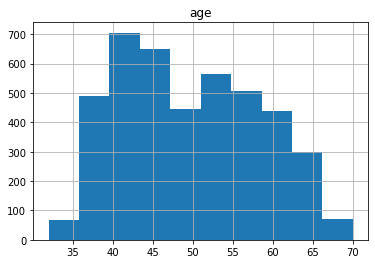

In [19]:
# Plot a histogram of Age
df.hist(column='age')

Pairs plots are a powerful tool to quickly explore distributions and relationships in a dataset. Seaborn provides a simple default method for making pair plots that can be customized and extended through the Pair Grid class. In a data analysis project, a major portion of the value often comes not in the flashy machine learning, but in the straightforward visualization of data. A pairs plot is provides us with a comprehensive first look at our data and is a great starting point in data analysis projects. [8]

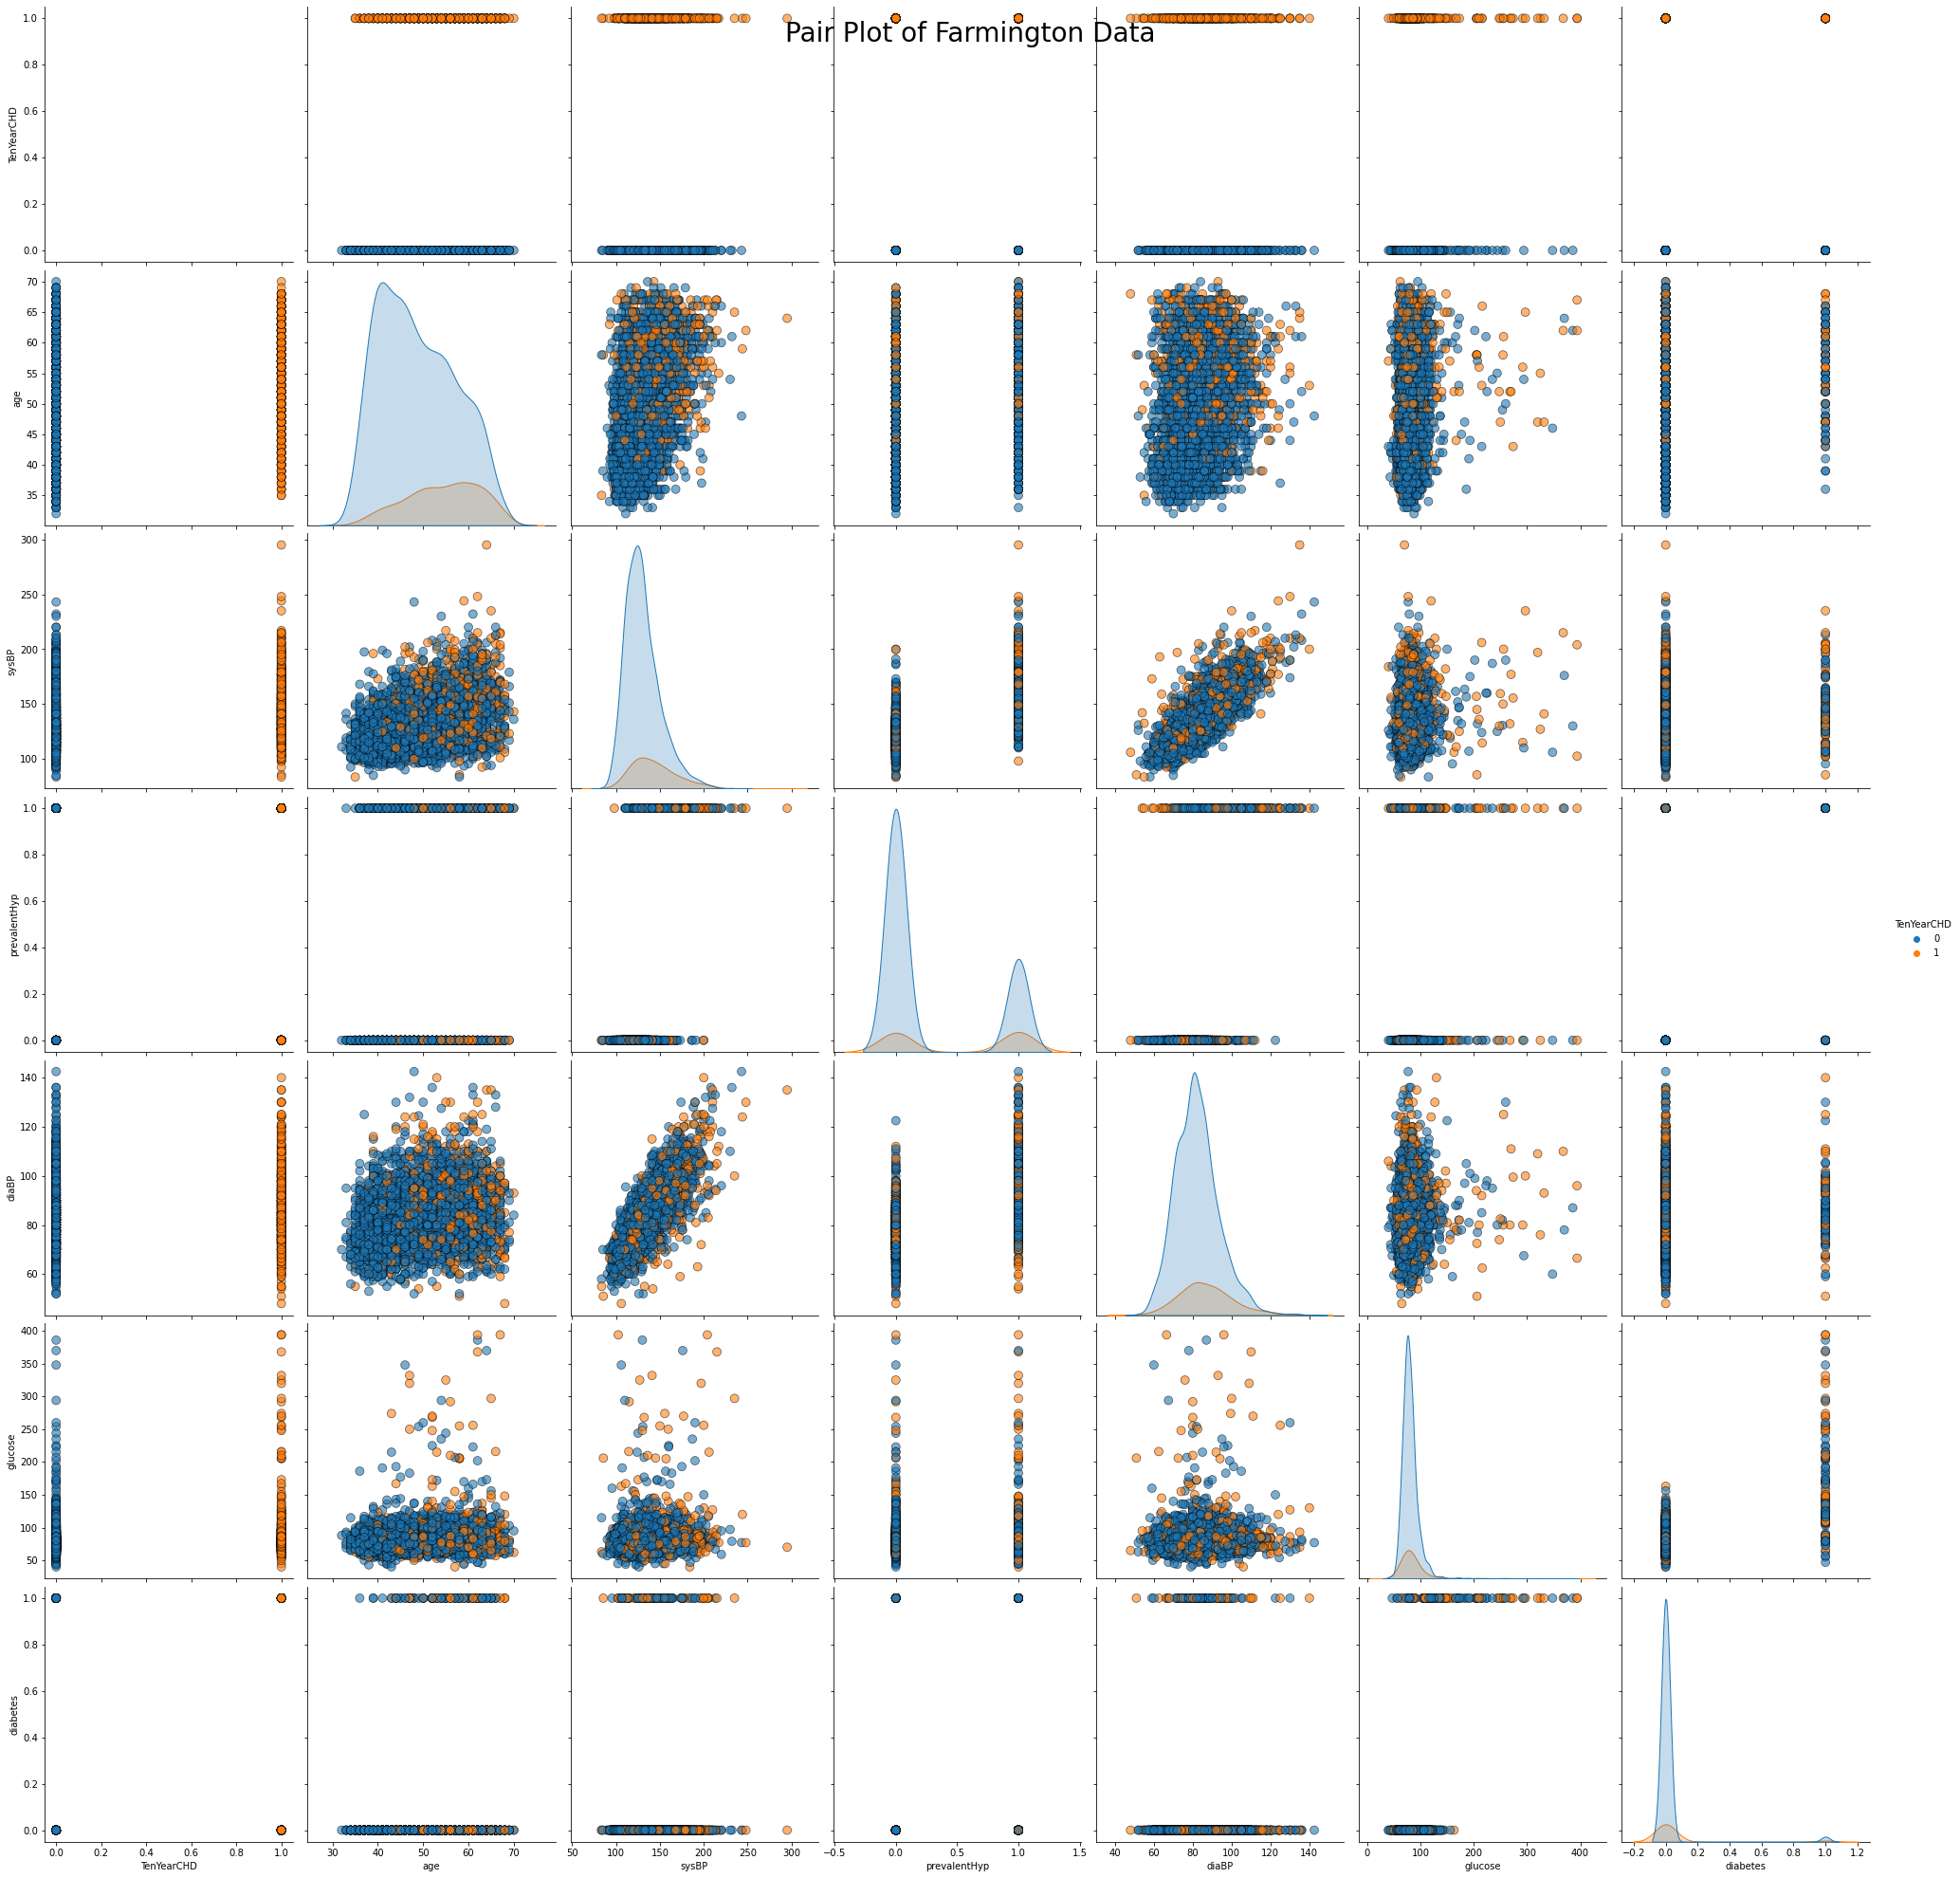

In [28]:
# Investigate with Seaborn
# Plot colored
sns.pairplot(High_corr, 
             vars = ['TenYearCHD','age','sysBP','prevalentHyp','diaBP','glucose', 'diabetes'], 
             hue="TenYearCHD", diag_kind = 'kde', 
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 4);# Title 
plt.suptitle('Pair Plot of Farmington Data', size = 28);

# References 

[1] https://www.bbc.co.uk/bitesize/guides/zvxp34j/revision/3

[2] https://nfb.org//sites/default/files/images/nfb/publications/vodold/vspr9804.htm

[3] https://github.com/TarekDib03/Analytics/blob/master/Week3%20-%20Logistic%20Regression/Data/framingham.csv

[4] https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html

[5] https://www.geeksforgeeks.org/sort-correlation-matrix-in-python/

[6] https://cmdlinetips.com/2020/11/how-to-get-number-of-missing-values-in-each-column-in-pandas/

[7] https://statisticsglobe.com/drop-rows-blank-values-from-pandas-dataframe-python

[8] https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166